# KDE approach  (DR4)

<h5 style="text-align:right; margin-right:15px"> 2024-06-27 16:27</h5>

Not applying ML, so no class fits to generate prediction model. Instead we compute KDE probability density distributions
for the ML trainers, which we then apply to the unID and bcu associations.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd3504867d0>

### Data selection cut: "0.15<Ep<4 & variability<25"

association_class,blazar,pulsar,galaxy,Galactic,unID
total,2283,316,88,223,3903
selected,285,299,27,163,1893
%,12,95,31,73,49


## Create KDE functions instead of ML training
* Classes: psr, msp, blazar
* Features: sqrt_d, log_epeak, diffuse 

Apply to unIDs + bcus

saved KDE setup to `files/kde_data.csv`

### Evaluate KDE's on a 3-D grid<br>
* N = 25 for components & unID<br>
* Uses the scipy  [gaussian_kde](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) "bw_method"=
        0.25

### Projections

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd34e24c220>
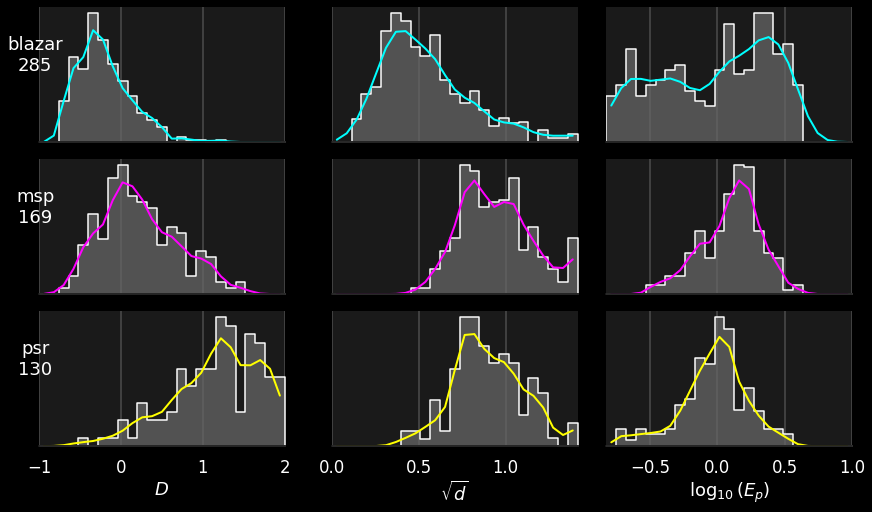

### 3-D optimization

__Fit__

,fit,unc
psr,550.1,27.1
msp,207.2,49.4
blazar,395.2,25.1


sum: 1152.5 $\pm$ 42.8

Correlation matrix:

array([[ 1.  , -0.53,  0.16],
       [-0.53,  1.  , -0.31],
       [ 0.16, -0.31,  1.  ]])

$\rightarrow$ Implied number of gevatars:
1893-1152.5=740.5 $\pm$ 42.8 

### Fit result plot

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd34e2bd5d0>
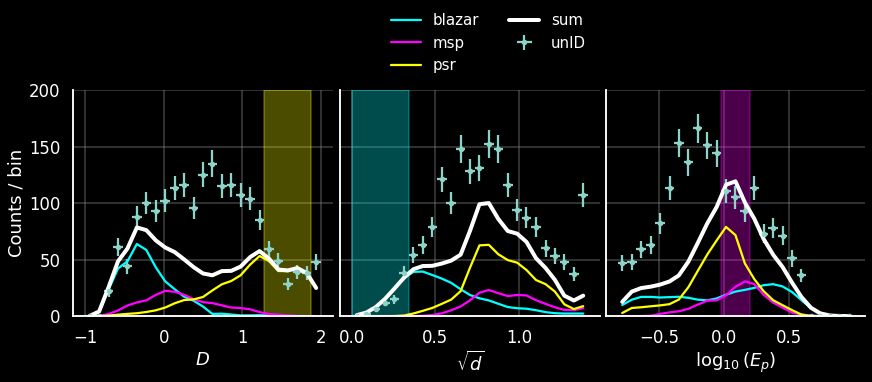

### Residuals from fit

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd34fb3f130>
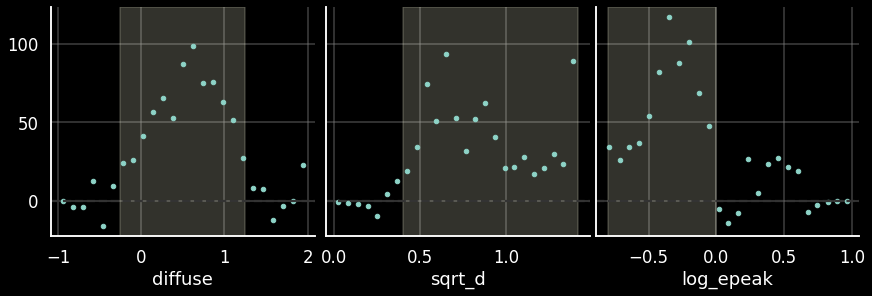

In [2]:
%reset -f
%run pylib/ml_fit dark paper
self, data = kde_setup()

from pylib.kde import FeatureSpace
fs = FeatureSpace.runit(data, dark_mode, self.palette)


In [31]:
show("""Add `p_pulsar` value to data""")
dft = pd.read_csv('files/dr4_2_class_classification.csv',index_col=0)
data['p_pulsar'] = dft.p_pulsar


Add `p_pulsar` value to data

In [138]:
def pulsar_vs_ep(data,  ax=None, title=''):
    assert(len(data)>0)
    fig, ax = plt.subplots(figsize=(10,8) ) if ax is None else (ax.figure, ax)

    kw = dict( ax=ax, y='p_pulsar', x='log_epeak', s=30, legend=False  ) #color='grey' )
    sns.scatterplot(data, hue='diffuse', hue_norm=(-0.5, 1.5),  
                    edgecolor='none',   palette='Spectral',    **kw, );
    # ax.legend(title='Galactic-ness',title_fontsize=14, fontsize=12)
    ax.set(title=title,yticks=np.arange(0,1.01, 0.2),# **epeak_kw(),
            xlim=(-1,1), **epeak_kw());
    return fig

## Study gevatar separation using ML pulsar probability and $E_p$

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd33d31ae30>
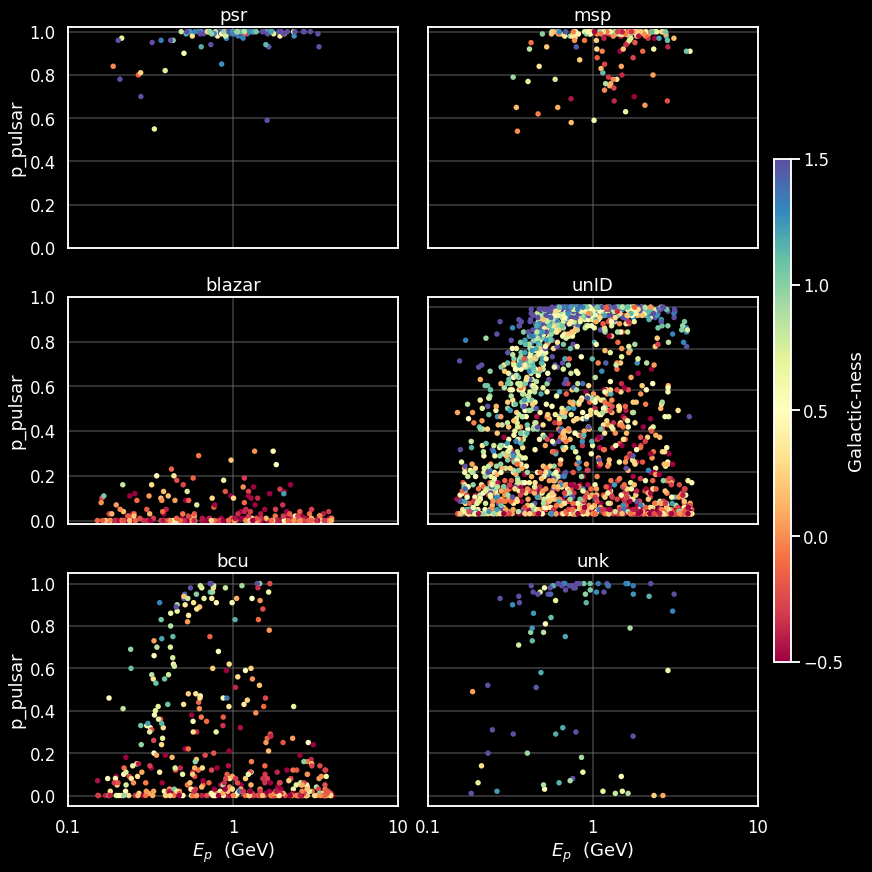

IOStream.flush timed out


In [144]:
show("""## Study gevatar separation using ML pulsar probability and $E_p$""")

def multiple_pulsar_vs_epeak(data):
    """


    """
    fig = plt.figure(figsize=(12,12), layout="constrained",)# sharey=True, sharex=True)
    axd = fig.subplot_mosaic([['psr',   'msp',  '.'],
                              ['psr',   'msp',  'cbar'],
                              ['blazar','unID', 'cbar'],
                              ['blazar','unID', 'cbar'],
                              ['bcu',   'unk',  'cbar'],
                              ['bcu',   'unk',  '.'],
                             ],
                            width_ratios=[20,20,1],)
    cmap= sns.color_palette('Spectral', as_cmap= True)
    import matplotlib as mpl
    
    
    def select_data(name):
        if name in 'psr msp blazar unID'.split():
            return data[data.subset==name]
        else:
            return data[data.class1==name]
            
    for label, ax in axd.items():
        if label=='cbar':
            cbar = plt.colorbar( plt.cm.ScalarMappable(cmap=cmap, 
                                                       norm=mpl.colors.Normalize(-0.5,1.5)),
                                cax=ax, )
            cbar.set_label('Galactic-ness')
            cbar.set_ticks(np.arange(-0.5, 1.51, 0.5))
        else:            
            pulsar_vs_ep(select_data(label),  ax, label)
            if label in 'psr msp blazar unID'.split(): ax.set(xlabel='', xticklabels=[])
            if label in 'msp unID unk' .split(): ax.set(ylabel='',yticklabels=[])
    return fig
            
show_fig(multiple_pulsar_vs_epeak, data)
    
    

## Study gevatar separation using ML pulsar probability and $E_p$

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd337658c70>
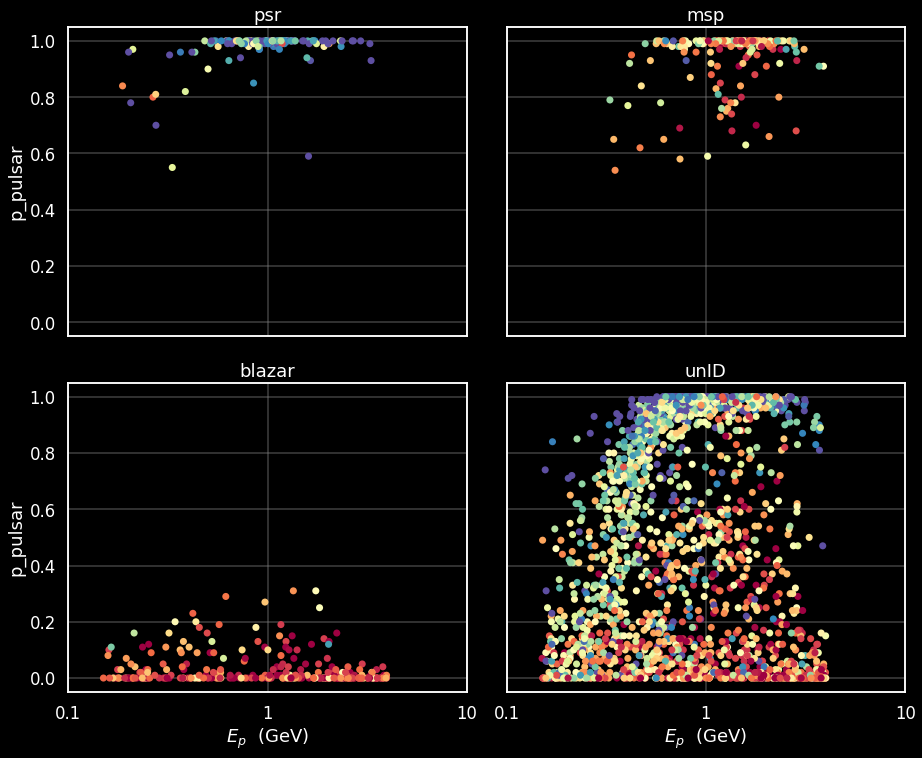

In [137]:
show("""## Study gevatar separation using ML pulsar probability and $E_p$""")
fig, axx = plt.subplots(2,2, figsize=(15,12),sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.15, wspace=0.1))
for ax, subset in zip(axx.flat, 'psr msp blazar unID'.split()):
    pulsar_vs_ep(data[data.subset==subset],  ax, subset)
show(fig)

### BCU and UNK components of unID

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd33e5bd270>
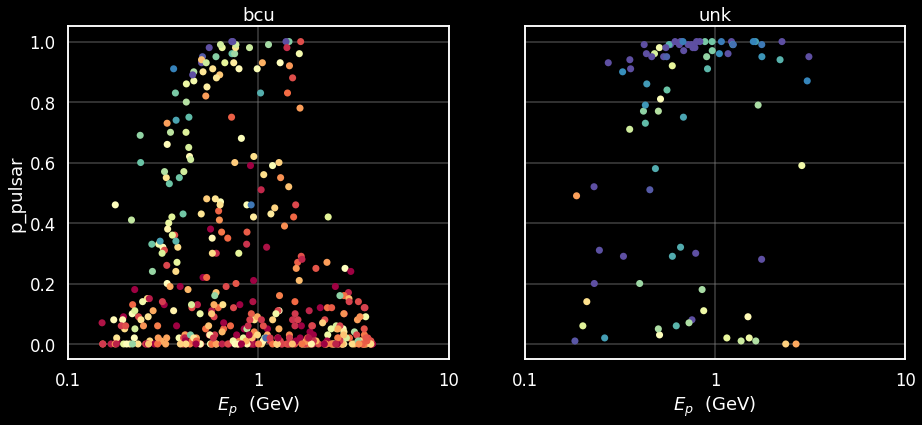

In [84]:
show("""### BCU and UNK components of unID""")
fig, axx = plt.subplots(ncols=2, figsize=(15,6), sharex=True, sharey=True)
for ax, subset in zip(axx.flat, 'bcu unk'.split()):
    pulsar_vs_ep(data.query(f'class1=="{subset}"'), ax, title=subset);

    

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fd33786fa90>
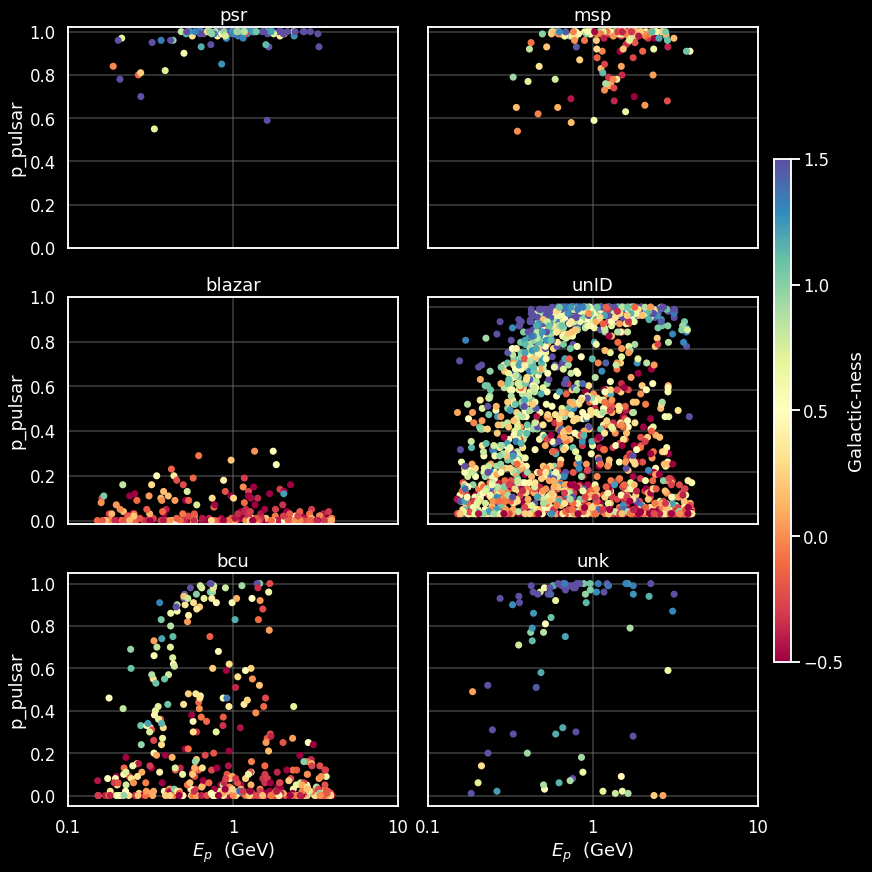

In [136]:
fig = plt.figure(figsize=(12,12), layout="constrained",)# sharey=True, sharex=True)
axd = fig.subplot_mosaic([['psr',   'msp',  '.'],
                          ['psr',   'msp',  'cbar'],
                          ['blazar','unID', 'cbar'],
                          ['blazar','unID', 'cbar'],
                          ['bcu', 'unk', 'cbar'],
                          ['bcu', 'unk', '.'],
                         ],
                        width_ratios=[20,20,1],)
cmap= sns.color_palette('Spectral', as_cmap= True)
import matplotlib as mpl


def select_data(name):
    if name in data.groupby('subset').size().index: 
        return data[data.subset==name]
    else:
        return data[data.class1==name]
        
for label, ax in axd.items():
    if label=='cbar':
        cbar = plt.colorbar( plt.cm.ScalarMappable(cmap=cmap, 
                                                   norm=mpl.colors.Normalize(-0.5,1.5)),
                            cax=ax, )
        cbar.set_label('Galactic-ness')
        cbar.set_ticks(np.arange(-0.5, 1.51, 0.5))
    else:
        
        pulsar_vs_ep(select_data(label),  ax, label)
        if label in 'psr msp blazar unID'.split(): ax.set(xlabel='', xticklabels=[])
        if label in 'msp unID unk' .split(): ax.set(ylabel='',yticklabels=[])
            
show(fig)
    
    

In [121]:
def select_data(name):
    if name in data.groupby('subset').size().index: 
        return data[data.subset==name]
    else:
        return data[data.class1==name]
select_data('bcu')

,glat,glon,significance,flags,r95,variability,class1,association,Ep,Fp,...,trainer,subset,association_class,diffuse,blazar_kde,msp_kde,psr_kde,spp_kde,unID_kde,p_pulsar
4FGL-DR4,,,,,,,,,,,,,,,,,,,,,
4FGL J0002.3-0815,-67.848328,89.043449,5.269459,{},0.0677,13.427114,bcu,unID,2.764661,0.012032,...,NaN,unID,unID,-0.481,1.397606,2.346633e-03,2.706434e-08,0.002453,0.254420,0.00
4FGL J0003.5+0717,-53.673813,102.593781,5.473022,{},0.0930,12.027017,bcu,unID,2.233675,0.022998,...,NaN,unID,unID,-0.249,0.370016,1.101465e+00,6.796225e-02,0.000564,0.270387,0.08
4FGL J0007.5-5247,-63.069733,317.653076,5.705449,"{3,5}",0.4074,10.770041,bcu,unID,0.511425,0.054139,...,NaN,unID,unID,-0.581,0.200311,9.927976e-02,1.526991e-03,0.000980,0.070972,0.22
4FGL J0008.0-3937,-74.583328,335.996185,5.946190,{5},0.2301,19.712507,bcu,unID,0.195194,0.152719,...,NaN,unID,unID,-0.657,0.193801,3.618842e-06,1.456208e-02,0.000010,0.058229,0.09
4FGL J0021.5-2221,-81.705566,66.407135,4.585622,{5},0.1909,20.074259,bcu,unID,0.180261,0.119792,...,NaN,unID,unID,-0.614,0.137014,3.645484e-07,4.363013e-03,0.000038,0.049035,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4FGL J2358.1-2853,-78.124207,21.289448,14.979347,{},0.0594,13.313108,bcu,unID,0.893450,0.144723,...,NaN,unID,unID,-0.622,0.664495,1.305725e-01,9.396165e-05,0.000065,0.210852,0.03
4FGL J2358.4+6547,3.469421,117.528381,7.663729,"{3,4}",0.0680,16.622759,bcu,unID,0.368265,2.254596,...,NaN,unID,unID,1.144,0.008491,8.072253e-02,3.149487e-01,0.516749,0.511331,0.34
4FGL J2359.1+1719,-43.772465,105.517410,7.142911,{},0.0542,9.731165,bcu,unID,2.549412,0.017160,...,NaN,unID,unID,-0.388,1.833767,9.345684e-04,3.065781e-08,0.008145,0.251585,0.00
